In [1]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import warnings

scaler = MinMaxScaler()
new_match = pd.read_csv('cleaned_match.csv')

# Notebook to examine team performance

We will first determine the predictive accuracy of various algorithms on the target variable (home team winning). The results show a decent test set accuracy by Naive Bayes, Random Forest and Logistic Regression, with Logistic Regression showing the highest accuracy.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

variable = 'h_win'
attr = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'h_buildUpPlaySpeedClass_Balanced', 'h_buildUpPlaySpeedClass_Fast', 'h_buildUpPlaySpeedClass_Slow', 'h_buildUpPlayDribblingClass_Little', 'h_buildUpPlayDribblingClass_Lots', 'h_buildUpPlayDribblingClass_Normal', 'h_buildUpPlayPassingClass_Long', 'h_buildUpPlayPassingClass_Mixed', 'h_buildUpPlayPassingClass_Short', 'h_buildUpPlayPositioningClass_Free Form', 'h_buildUpPlayPositioningClass_Organised', 'h_chanceCreationPassingClass_Normal', 'h_chanceCreationPassingClass_Risky', 'h_chanceCreationPassingClass_Safe', 'h_chanceCreationCrossingClass_Little', 'h_chanceCreationCrossingClass_Lots', 'h_chanceCreationCrossingClass_Normal', 'h_chanceCreationShootingClass_Little', 'h_chanceCreationShootingClass_Lots', 'h_chanceCreationShootingClass_Normal', 'h_chanceCreationPositioningClass_Free Form', 'h_chanceCreationPositioningClass_Organised', 'h_defencePressureClass_Deep', 'h_defencePressureClass_High', 'h_defencePressureClass_Medium', 'h_defenceAggressionClass_Contain', 'h_defenceAggressionClass_Double', 'h_defenceAggressionClass_Press', 'h_defenceTeamWidthClass_Narrow', 'h_defenceTeamWidthClass_Normal', 'h_defenceTeamWidthClass_Wide', 'h_defenceDefenderLineClass_Cover', 'h_defenceDefenderLineClass_Offside Trap', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'a_buildUpPlaySpeedClass_Balanced', 'a_buildUpPlaySpeedClass_Fast', 'a_buildUpPlaySpeedClass_Slow', 'a_buildUpPlayDribblingClass_Little', 'a_buildUpPlayDribblingClass_Lots', 'a_buildUpPlayDribblingClass_Normal', 'a_buildUpPlayPassingClass_Long', 'a_buildUpPlayPassingClass_Mixed', 'a_buildUpPlayPassingClass_Short', 'a_buildUpPlayPositioningClass_Free Form', 'a_buildUpPlayPositioningClass_Organised', 'a_chanceCreationPassingClass_Normal', 'a_chanceCreationPassingClass_Risky', 'a_chanceCreationPassingClass_Safe', 'a_chanceCreationCrossingClass_Little', 'a_chanceCreationCrossingClass_Lots', 'a_chanceCreationCrossingClass_Normal', 'a_chanceCreationShootingClass_Little', 'a_chanceCreationShootingClass_Lots', 'a_chanceCreationShootingClass_Normal', 'a_chanceCreationPositioningClass_Free Form', 'a_chanceCreationPositioningClass_Organised', 'a_defencePressureClass_Deep', 'a_defencePressureClass_High', 'a_defencePressureClass_Medium', 'a_defenceAggressionClass_Contain', 'a_defenceAggressionClass_Double', 'a_defenceAggressionClass_Press', 'a_defenceTeamWidthClass_Narrow', 'a_defenceTeamWidthClass_Normal', 'a_defenceTeamWidthClass_Wide', 'a_defenceDefenderLineClass_Cover', 'a_defenceDefenderLineClass_Offside Trap', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo', variable]
attr_to_scale = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo']

df = new_match[attr].dropna()
attr.remove(variable)
Y = df[variable]
X = df[attr]
X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
# RF
clf = RandomForestClassifier(max_depth=20, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Random forest accuracy: ", accuracy_score(y_test, y_pred))
# Naive bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Naive Bayes accuracy: ", accuracy_score(y_test, y_pred))
# Logistic
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
logit = sm.Logit(y_train, X_train)
result = logit.fit(method='newton')
y_pred = np.where(result.predict(X_test)>0.5, 1, 0)
print("Logistic Regression accuracy: ", accuracy_score(y_test, y_pred))

<ipython-input-47-929980934c62>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])
C:\Users\ChangChuanHong\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Random forest accuracy:  0.5954578754578754
Naive Bayes accuracy:  0.5966300366300367
Optimization terminated successfully.
         Current function value: 0.622558
         Iterations 19
Logistic Regression accuracy:  0.6458608058608059


# Examining various team_attributes in predicting team wins

The predictors are a mix of one hot encoded categoricals and numeric variables. Furthermore, as this is a categorical prediction problem, we shall use logistic regression coefficients. 

### Feature Selection
We will use the team attributes to examine their relationship with the teams winning a tournament.
The team attributes for home team (prefix 'h_') and away team ('a_') are used for this study. Furthermore, we engineer several more features:
1. Elo ratings for home and away teams.
2. Ratios of the numerical variables for home and away using the formula home_attr/away_attr. ['r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo']. This tells us the magnitude of difference.
3. We include the stage as well, as it may provide information on how different team attributes may contribute as a league progresses.

Furthermore, the categorical variables are one hot encoded using their original variable names appended with _Class.

Numerical variables are scaled to take a range of [0,1] to avoid biasing the logistic regression model.

Null values are dropped.

### Intepreting results
The coefficient estimates tell you about the relationship between the independent variables and the dependent variable. These estimates tell us the amount of increase in the predicted log odds of h)win = 1 that would be predicted by a 1 unit increase in the predictor, holding all other predictors constant.For the independent variables which are not significant, the coefficients are not significantly different from 0. The P > |Z| column provide the z-value and 2-tailed p-value used in testing the null hypothesis that the coefficient (parameter) is 0.

Ref: https://stats.idre.ucla.edu/stata/output/logistic-regression-analysis/


### Results

The results are obtained as follows. The accuracy of the models range between 0.62 to 0.74, which is alright for the purpose of this study

Let us assume that p values < 0.05 are significant. The following are identified:

'h_win': ratio of defenceAggression, the elo ratings, stage of match, away and home team defence aggression

away team win: elo ratings, ratio of buildUpPlayDribbling and home's teams buildUpPlayDribbling attribute.

draw: elo ratings, stage and ratio of defence pressure.


In [18]:
"""Tagret: Home team winning"""

variable = 'h_win'
attr = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'h_buildUpPlaySpeedClass_Balanced', 'h_buildUpPlaySpeedClass_Fast', 'h_buildUpPlaySpeedClass_Slow', 'h_buildUpPlayDribblingClass_Little', 'h_buildUpPlayDribblingClass_Lots', 'h_buildUpPlayDribblingClass_Normal', 'h_buildUpPlayPassingClass_Long', 'h_buildUpPlayPassingClass_Mixed', 'h_buildUpPlayPassingClass_Short', 'h_buildUpPlayPositioningClass_Free Form', 'h_buildUpPlayPositioningClass_Organised', 'h_chanceCreationPassingClass_Normal', 'h_chanceCreationPassingClass_Risky', 'h_chanceCreationPassingClass_Safe', 'h_chanceCreationCrossingClass_Little', 'h_chanceCreationCrossingClass_Lots', 'h_chanceCreationCrossingClass_Normal', 'h_chanceCreationShootingClass_Little', 'h_chanceCreationShootingClass_Lots', 'h_chanceCreationShootingClass_Normal', 'h_chanceCreationPositioningClass_Free Form', 'h_chanceCreationPositioningClass_Organised', 'h_defencePressureClass_Deep', 'h_defencePressureClass_High', 'h_defencePressureClass_Medium', 'h_defenceAggressionClass_Contain', 'h_defenceAggressionClass_Double', 'h_defenceAggressionClass_Press', 'h_defenceTeamWidthClass_Narrow', 'h_defenceTeamWidthClass_Normal', 'h_defenceTeamWidthClass_Wide', 'h_defenceDefenderLineClass_Cover', 'h_defenceDefenderLineClass_Offside Trap', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'a_buildUpPlaySpeedClass_Balanced', 'a_buildUpPlaySpeedClass_Fast', 'a_buildUpPlaySpeedClass_Slow', 'a_buildUpPlayDribblingClass_Little', 'a_buildUpPlayDribblingClass_Lots', 'a_buildUpPlayDribblingClass_Normal', 'a_buildUpPlayPassingClass_Long', 'a_buildUpPlayPassingClass_Mixed', 'a_buildUpPlayPassingClass_Short', 'a_buildUpPlayPositioningClass_Free Form', 'a_buildUpPlayPositioningClass_Organised', 'a_chanceCreationPassingClass_Normal', 'a_chanceCreationPassingClass_Risky', 'a_chanceCreationPassingClass_Safe', 'a_chanceCreationCrossingClass_Little', 'a_chanceCreationCrossingClass_Lots', 'a_chanceCreationCrossingClass_Normal', 'a_chanceCreationShootingClass_Little', 'a_chanceCreationShootingClass_Lots', 'a_chanceCreationShootingClass_Normal', 'a_chanceCreationPositioningClass_Free Form', 'a_chanceCreationPositioningClass_Organised', 'a_defencePressureClass_Deep', 'a_defencePressureClass_High', 'a_defencePressureClass_Medium', 'a_defenceAggressionClass_Contain', 'a_defenceAggressionClass_Double', 'a_defenceAggressionClass_Press', 'a_defenceTeamWidthClass_Narrow', 'a_defenceTeamWidthClass_Normal', 'a_defenceTeamWidthClass_Wide', 'a_defenceDefenderLineClass_Cover', 'a_defenceDefenderLineClass_Offside Trap', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo', variable]
attr_to_scale = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo']

df = new_match[attr].dropna()
attr.remove(variable)
Y = df[variable]
X = df[attr]
X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])

x = sm.add_constant(X)
logit = sm.Logit(Y, x)
result = logit.fit(method='newton')
y_pred = np.where(result.predict()>0.5, 1, 0)
print("Logistic Regression accuracy: ", accuracy_score(Y, y_pred))
result.summary()

Optimization terminated successfully.
         Current function value: 0.624130
         Iterations 7
Logistic Regression accuracy:  0.6417184386355644


<ipython-input-18-cf5427d9edaa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])
C:\Users\ChangChuanHong\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  h_win   No. Observations:                17062
Model:                          Logit   Df Residuals:                    16988
Method:                           MLE   Df Model:                           73
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                 0.09608
Time:                        17:00:11   Log-Likelihood:                -10649.
converged:                       True   LL-Null:                       -11781.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1529   4.94e+05    3.1e-07      1.000   -9.67e+05    9.67e+05
stage                                          0.1199      0.057      2.094      0.036       0.008       0.232
h_buildUpPlaySpeed                             0.1637      0.373      0.439      0.661      -0.568       0.895
h_buildUpPlayDribbling                         0.3428      0.361      0.951      0.342      -0.364       1.049
h_buildUpPlayPassing                           0.0476      0.339      0.140      0.888      -0.616       0.711
h_chanceCreationPassing                        0.3530      0.341      1.034      0.301      -0.316       1.022
h_chanceCreationCrossing                      -0.2901      0.351     -0.826      0.409      -0.978       0.398
h_chanceCreationShooting                       0.2837      0.276      1.029      0.304      -0.257       0.824
h_defencePressure                             -0.1813      0.358     -0.506      0.613      -0.883       0.521
h_defenceAggression                            1.4029      0.442      3.177      0.001       0.537       2.268
h_defenceTeamWidth                             0.4787      0.434      1.104      0.270      -0.371       1.328
h_buildUpPlaySpeedClass_Balanced               0.0440   7.33e+05      6e-08      1.000   -1.44e+06    1.44e+06
h_buildUpPlaySpeedClass_Fast                   0.1125   8.15e+05   1.38e-07      1.000    -1.6e+06     1.6e+06
h_buildUpPlaySpeedClass_Slow                  -0.0036   7.73e+05   -4.7e-09      1.000   -1.51e+06    1.51e+06
h_buildUpPlayDribblingClass_Little             0.0666   6.58e+05   1.01e-07      1.000   -1.29e+06    1.29e+06
h_buildUpPlayDribblingClass_Lots               0.0299   6.39e+05   4.68e-08      1.000   -1.25e+06    1.25e+06
h_buildUpPlayDribblingClass_Normal             0.0564   6.68e+05   8.44e-08      1.000   -1.31e+06    1.31e+06
h_buildUpPlayPassingClass_Long                -0.0432   3.85e+05  -1.12e-07      1.000   -7.54e+05    7.54e+05
h_buildUpPlayPassingClass_Mixed                0.1141   3.79e+05   3.01e-07      1.000   -7.42e+05    7.42e+05
h_buildUpPlayPassingClass_Short                0.0820   3.72e+05    2.2e-07      1.000    -7.3e+05     7.3e+05
h_buildUpPlayPositioningClass_Free Form        0.1875        nan        nan        nan         nan         nan
h_buildUpPlayPositioningClass_Organised       -0.0347        nan        nan        nan         nan         nan
h_chanceCreationPassingClass_Normal            0.0856   8.71e+05   9.83e-08      1.000   -1.71e+06    1.71e+06
h_chanceCreationPassingClass_Risky             0.1449    8.3e+05   1.75e-07      1.000   -1.63e+06    1.63e+06
h_chanceCreationPassingClass_Safe             -0.0776   8.09e+05  -9.59e-08      1.000   -1.59e+06    1.59e+06
h_chanceCreationCrossingClass_Little           0.0562        nan        nan        nan         nan         nan
h_chanceCreationCrossi

In [23]:
"""Tagret: Away team winning"""

variable = 'a_win'
attr = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'h_buildUpPlaySpeedClass_Balanced', 'h_buildUpPlaySpeedClass_Fast', 'h_buildUpPlaySpeedClass_Slow', 'h_buildUpPlayDribblingClass_Little', 'h_buildUpPlayDribblingClass_Lots', 'h_buildUpPlayDribblingClass_Normal', 'h_buildUpPlayPassingClass_Long', 'h_buildUpPlayPassingClass_Mixed', 'h_buildUpPlayPassingClass_Short', 'h_buildUpPlayPositioningClass_Free Form', 'h_buildUpPlayPositioningClass_Organised', 'h_chanceCreationPassingClass_Normal', 'h_chanceCreationPassingClass_Risky', 'h_chanceCreationPassingClass_Safe', 'h_chanceCreationCrossingClass_Little', 'h_chanceCreationCrossingClass_Lots', 'h_chanceCreationCrossingClass_Normal', 'h_chanceCreationShootingClass_Little', 'h_chanceCreationShootingClass_Lots', 'h_chanceCreationShootingClass_Normal', 'h_chanceCreationPositioningClass_Free Form', 'h_chanceCreationPositioningClass_Organised', 'h_defencePressureClass_Deep', 'h_defencePressureClass_High', 'h_defencePressureClass_Medium', 'h_defenceAggressionClass_Contain', 'h_defenceAggressionClass_Double', 'h_defenceAggressionClass_Press', 'h_defenceTeamWidthClass_Narrow', 'h_defenceTeamWidthClass_Normal', 'h_defenceTeamWidthClass_Wide', 'h_defenceDefenderLineClass_Cover', 'h_defenceDefenderLineClass_Offside Trap', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'a_buildUpPlaySpeedClass_Balanced', 'a_buildUpPlaySpeedClass_Fast', 'a_buildUpPlaySpeedClass_Slow', 'a_buildUpPlayDribblingClass_Little', 'a_buildUpPlayDribblingClass_Lots', 'a_buildUpPlayDribblingClass_Normal', 'a_buildUpPlayPassingClass_Long', 'a_buildUpPlayPassingClass_Mixed', 'a_buildUpPlayPassingClass_Short', 'a_buildUpPlayPositioningClass_Free Form', 'a_buildUpPlayPositioningClass_Organised', 'a_chanceCreationPassingClass_Normal', 'a_chanceCreationPassingClass_Risky', 'a_chanceCreationPassingClass_Safe', 'a_chanceCreationCrossingClass_Little', 'a_chanceCreationCrossingClass_Lots', 'a_chanceCreationCrossingClass_Normal', 'a_chanceCreationShootingClass_Little', 'a_chanceCreationShootingClass_Lots', 'a_chanceCreationShootingClass_Normal', 'a_chanceCreationPositioningClass_Free Form', 'a_chanceCreationPositioningClass_Organised', 'a_defencePressureClass_Deep', 'a_defencePressureClass_High', 'a_defencePressureClass_Medium', 'a_defenceAggressionClass_Contain', 'a_defenceAggressionClass_Double', 'a_defenceAggressionClass_Press', 'a_defenceTeamWidthClass_Narrow', 'a_defenceTeamWidthClass_Normal', 'a_defenceTeamWidthClass_Wide', 'a_defenceDefenderLineClass_Cover', 'a_defenceDefenderLineClass_Offside Trap', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo', variable]
attr_to_scale = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo']

df = new_match[attr].dropna()
attr.remove(variable)
Y = df[variable]
X = df[attr]
X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])

x = sm.add_constant(X)
logit = sm.Logit(Y, x)
result = logit.fit(method='newton')
y_pred = np.where(result.predict()>0.5, 1, 0)
print("Logistic Regression accuracy: ", accuracy_score(Y, y_pred))
result.summary()

Optimization terminated successfully.
         Current function value: 0.537021
         Iterations 8
Logistic Regression accuracy:  0.7404759113820185


<ipython-input-23-26b00b760d41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])
C:\Users\ChangChuanHong\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  a_win   No. Observations:                17062
Model:                          Logit   Df Residuals:                    16988
Method:                           MLE   Df Model:                           73
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                  0.1005
Time:                        17:17:56   Log-Likelihood:                -9162.6
converged:                       True   LL-Null:                       -10187.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.2519        nan        nan        nan         nan         nan
stage                                          0.0083      0.063      0.131      0.896      -0.115       0.132
h_buildUpPlaySpeed                            -0.0442      0.410     -0.108      0.914      -0.848       0.760
h_buildUpPlayDribbling                        -0.9394      0.396     -2.373      0.018      -1.715      -0.163
h_buildUpPlayPassing                           0.4488      0.351      1.280      0.200      -0.238       1.136
h_chanceCreationPassing                       -0.4256      0.368     -1.158      0.247      -1.146       0.295
h_chanceCreationCrossing                       0.0322      0.386      0.083      0.934      -0.724       0.789
h_chanceCreationShooting                      -0.2164      0.308     -0.704      0.482      -0.819       0.386
h_defencePressure                             -0.5008      0.402     -1.247      0.213      -1.288       0.286
h_defenceAggression                           -0.7200      0.519     -1.387      0.165      -1.737       0.297
h_defenceTeamWidth                            -0.3883      0.478     -0.813      0.416      -1.325       0.548
h_buildUpPlaySpeedClass_Balanced              -0.1208        nan        nan        nan         nan         nan
h_buildUpPlaySpeedClass_Fast                  -0.2385        nan        nan        nan         nan         nan
h_buildUpPlaySpeedClass_Slow                   0.1074        nan        nan        nan         nan         nan
h_buildUpPlayDribblingClass_Little            -0.1004        nan        nan        nan         nan         nan
h_buildUpPlayDribblingClass_Lots              -0.1160        nan        nan        nan         nan         nan
h_buildUpPlayDribblingClass_Normal            -0.0355        nan        nan        nan         nan         nan
h_buildUpPlayPassingClass_Long                -0.1124    2.8e+06  -4.01e-08      1.000    -5.5e+06     5.5e+06
h_buildUpPlayPassingClass_Mixed               -0.0827   2.76e+06  -2.99e-08      1.000   -5.42e+06    5.42e+06
h_buildUpPlayPassingClass_Short               -0.0568   2.75e+06  -2.06e-08      1.000    -5.4e+06     5.4e+06
h_buildUpPlayPositioningClass_Free Form       -0.2182   1.61e+06  -1.35e-07      1.000   -3.16e+06    3.16e+06
h_buildUpPlayPositioningClass_Organised       -0.0337   1.68e+06  -2.01e-08      1.000   -3.29e+06    3.29e+06
h_chanceCreationPassingClass_Normal           -0.1141    3.8e+05  -3.01e-07      1.000   -7.44e+05    7.44e+05
h_chanceCreationPassingClass_Risky            -0.2113   3.83e+05  -5.52e-07      1.000    -7.5e+05     7.5e+05
h_chanceCreationPassingClass_Safe              0.0736   3.85e+05   1.91e-07      1.000   -7.54e+05    7.54e+05
h_chanceCreationCrossingClass_Little          -0.1384   8.81e+05  -1.57e-07      1.000   -1.73e+06    1.73e+06
h_chanceCreationCrossi

In [24]:
"""Tagret: Draw"""

variable = 'draw'
attr = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'h_buildUpPlaySpeedClass_Balanced', 'h_buildUpPlaySpeedClass_Fast', 'h_buildUpPlaySpeedClass_Slow', 'h_buildUpPlayDribblingClass_Little', 'h_buildUpPlayDribblingClass_Lots', 'h_buildUpPlayDribblingClass_Normal', 'h_buildUpPlayPassingClass_Long', 'h_buildUpPlayPassingClass_Mixed', 'h_buildUpPlayPassingClass_Short', 'h_buildUpPlayPositioningClass_Free Form', 'h_buildUpPlayPositioningClass_Organised', 'h_chanceCreationPassingClass_Normal', 'h_chanceCreationPassingClass_Risky', 'h_chanceCreationPassingClass_Safe', 'h_chanceCreationCrossingClass_Little', 'h_chanceCreationCrossingClass_Lots', 'h_chanceCreationCrossingClass_Normal', 'h_chanceCreationShootingClass_Little', 'h_chanceCreationShootingClass_Lots', 'h_chanceCreationShootingClass_Normal', 'h_chanceCreationPositioningClass_Free Form', 'h_chanceCreationPositioningClass_Organised', 'h_defencePressureClass_Deep', 'h_defencePressureClass_High', 'h_defencePressureClass_Medium', 'h_defenceAggressionClass_Contain', 'h_defenceAggressionClass_Double', 'h_defenceAggressionClass_Press', 'h_defenceTeamWidthClass_Narrow', 'h_defenceTeamWidthClass_Normal', 'h_defenceTeamWidthClass_Wide', 'h_defenceDefenderLineClass_Cover', 'h_defenceDefenderLineClass_Offside Trap', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'a_buildUpPlaySpeedClass_Balanced', 'a_buildUpPlaySpeedClass_Fast', 'a_buildUpPlaySpeedClass_Slow', 'a_buildUpPlayDribblingClass_Little', 'a_buildUpPlayDribblingClass_Lots', 'a_buildUpPlayDribblingClass_Normal', 'a_buildUpPlayPassingClass_Long', 'a_buildUpPlayPassingClass_Mixed', 'a_buildUpPlayPassingClass_Short', 'a_buildUpPlayPositioningClass_Free Form', 'a_buildUpPlayPositioningClass_Organised', 'a_chanceCreationPassingClass_Normal', 'a_chanceCreationPassingClass_Risky', 'a_chanceCreationPassingClass_Safe', 'a_chanceCreationCrossingClass_Little', 'a_chanceCreationCrossingClass_Lots', 'a_chanceCreationCrossingClass_Normal', 'a_chanceCreationShootingClass_Little', 'a_chanceCreationShootingClass_Lots', 'a_chanceCreationShootingClass_Normal', 'a_chanceCreationPositioningClass_Free Form', 'a_chanceCreationPositioningClass_Organised', 'a_defencePressureClass_Deep', 'a_defencePressureClass_High', 'a_defencePressureClass_Medium', 'a_defenceAggressionClass_Contain', 'a_defenceAggressionClass_Double', 'a_defenceAggressionClass_Press', 'a_defenceTeamWidthClass_Narrow', 'a_defenceTeamWidthClass_Normal', 'a_defenceTeamWidthClass_Wide', 'a_defenceDefenderLineClass_Cover', 'a_defenceDefenderLineClass_Offside Trap', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo', variable]
attr_to_scale = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'h_elo', 'a_elo', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', 'r_elo']

df = new_match[attr].dropna()
attr.remove(variable)
Y = df[variable]
X = df[attr]
X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])

x = sm.add_constant(X)
logit = sm.Logit(Y, x)
result = logit.fit(method='newton')
y_pred = np.where(result.predict()>0.5, 1, 0)
print("Logistic Regression accuracy: ", accuracy_score(Y, y_pred))
result.summary()

Optimization terminated successfully.
         Current function value: 0.558320
         Iterations 6
Logistic Regression accuracy:  0.7478021333958504


<ipython-input-24-4e36e2cb9fed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])
C:\Users\ChangChuanHong\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   draw   No. Observations:                17062
Model:                          Logit   Df Residuals:                    16988
Method:                           MLE   Df Model:                           73
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                 0.01136
Time:                        17:18:11   Log-Likelihood:                -9526.0
converged:                       True   LL-Null:                       -9635.5
Covariance Type:            nonrobust   LLR p-value:                 1.671e-16
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1745        nan        nan        nan         nan         nan
stage                                         -0.1435      0.062     -2.316      0.021      -0.265      -0.022
h_buildUpPlaySpeed                            -0.0794      0.405     -0.196      0.844      -0.873       0.714
h_buildUpPlayDribbling                         0.5091      0.390      1.306      0.191      -0.255       1.273
h_buildUpPlayPassing                          -0.2995      0.349     -0.858      0.391      -0.984       0.385
h_chanceCreationPassing                        0.1131      0.365      0.310      0.756      -0.601       0.828
h_chanceCreationCrossing                       0.4146      0.381      1.090      0.276      -0.331       1.160
h_chanceCreationShooting                      -0.2913      0.299     -0.974      0.330      -0.878       0.295
h_defencePressure                              0.8319      0.391      2.126      0.033       0.065       1.599
h_defenceAggression                           -0.5255      0.470     -1.117      0.264      -1.448       0.397
h_defenceTeamWidth                            -0.4082      0.471     -0.868      0.386      -1.331       0.514
h_buildUpPlaySpeedClass_Balanced               0.1149        nan        nan        nan         nan         nan
h_buildUpPlaySpeedClass_Fast                  -0.0035        nan        nan        nan         nan         nan
h_buildUpPlaySpeedClass_Slow                   0.0631        nan        nan        nan         nan         nan
h_buildUpPlayDribblingClass_Little             0.0753   1.03e+06   7.34e-08      1.000   -2.01e+06    2.01e+06
h_buildUpPlayDribblingClass_Lots               0.0639   1.02e+06   6.24e-08      1.000   -2.01e+06    2.01e+06
h_buildUpPlayDribblingClass_Normal             0.0353   1.09e+06   3.24e-08      1.000   -2.13e+06    2.13e+06
h_buildUpPlayPassingClass_Long                 0.1744        nan        nan        nan         nan         nan
h_buildUpPlayPassingClass_Mixed                0.0416        nan        nan        nan         nan         nan
h_buildUpPlayPassingClass_Short               -0.0416        nan        nan        nan         nan         nan
h_buildUpPlayPositioningClass_Free Form       -0.0518   8.11e+05  -6.39e-08      1.000   -1.59e+06    1.59e+06
h_buildUpPlayPositioningClass_Organised        0.2263   8.08e+05    2.8e-07      1.000   -1.58e+06    1.58e+06
h_chanceCreationPassingClass_Normal            0.0385   1.15e+06   3.35e-08      1.000   -2.25e+06    2.25e+06
h_chanceCreationPassingClass_Risky             0.1281   1.15e+06   1.11e-07      1.000   -2.26e+06    2.26e+06
h_chanceCreationPassingClass_Safe              0.0079   1.21e+06   6.57e-09      1.000   -2.36e+06    2.36e+06
h_chanceCreationCrossingClass_Little           0.0991        nan        nan        nan         nan         nan
h_chanceCreationCrossi

### Given the outsized impact of elo ratings, we shall also study the effects of team attributes without elo ratings

draw: ratio of defense pressure, stage

away win: r_chanceCreationCrossing, r_chanceCreationPassing, r_buildUpPlayDribbling, a_defencePressure, a_chanceCreationCrossing, a_chanceCreationPassing, a_buildUpPlayDribbling, a_buildUpPlaySpeed,h_defencePressure,  h_chanceCreationCrossing, h_chanceCreationPassing, h_buildUpPlayDribbling

home win: r_chanceCreationPassing, a_chanceCreationShooting, h_defenceAggression, h_buildUpPlayDribbling

There are several common factors such as r_chanceCreationPassing, h_defencePressure and h_buildUpPlayDribbling. Furthermore, their coefficients are of different directions (i.e. positive for hom win, negative for away etc.). This indicates that these are important factors in determining a team winning!

In [28]:
"""Tagret: Home team winning"""

variable = 'h_win'
attr = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'h_buildUpPlaySpeedClass_Balanced', 'h_buildUpPlaySpeedClass_Fast', 'h_buildUpPlaySpeedClass_Slow', 'h_buildUpPlayDribblingClass_Little', 'h_buildUpPlayDribblingClass_Lots', 'h_buildUpPlayDribblingClass_Normal', 'h_buildUpPlayPassingClass_Long', 'h_buildUpPlayPassingClass_Mixed', 'h_buildUpPlayPassingClass_Short', 'h_buildUpPlayPositioningClass_Free Form', 'h_buildUpPlayPositioningClass_Organised', 'h_chanceCreationPassingClass_Normal', 'h_chanceCreationPassingClass_Risky', 'h_chanceCreationPassingClass_Safe', 'h_chanceCreationCrossingClass_Little', 'h_chanceCreationCrossingClass_Lots', 'h_chanceCreationCrossingClass_Normal', 'h_chanceCreationShootingClass_Little', 'h_chanceCreationShootingClass_Lots', 'h_chanceCreationShootingClass_Normal', 'h_chanceCreationPositioningClass_Free Form', 'h_chanceCreationPositioningClass_Organised', 'h_defencePressureClass_Deep', 'h_defencePressureClass_High', 'h_defencePressureClass_Medium', 'h_defenceAggressionClass_Contain', 'h_defenceAggressionClass_Double', 'h_defenceAggressionClass_Press', 'h_defenceTeamWidthClass_Narrow', 'h_defenceTeamWidthClass_Normal', 'h_defenceTeamWidthClass_Wide', 'h_defenceDefenderLineClass_Cover', 'h_defenceDefenderLineClass_Offside Trap', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'a_buildUpPlaySpeedClass_Balanced', 'a_buildUpPlaySpeedClass_Fast', 'a_buildUpPlaySpeedClass_Slow', 'a_buildUpPlayDribblingClass_Little', 'a_buildUpPlayDribblingClass_Lots', 'a_buildUpPlayDribblingClass_Normal', 'a_buildUpPlayPassingClass_Long', 'a_buildUpPlayPassingClass_Mixed', 'a_buildUpPlayPassingClass_Short', 'a_buildUpPlayPositioningClass_Free Form', 'a_buildUpPlayPositioningClass_Organised', 'a_chanceCreationPassingClass_Normal', 'a_chanceCreationPassingClass_Risky', 'a_chanceCreationPassingClass_Safe', 'a_chanceCreationCrossingClass_Little', 'a_chanceCreationCrossingClass_Lots', 'a_chanceCreationCrossingClass_Normal', 'a_chanceCreationShootingClass_Little', 'a_chanceCreationShootingClass_Lots', 'a_chanceCreationShootingClass_Normal', 'a_chanceCreationPositioningClass_Free Form', 'a_chanceCreationPositioningClass_Organised', 'a_defencePressureClass_Deep', 'a_defencePressureClass_High', 'a_defencePressureClass_Medium', 'a_defenceAggressionClass_Contain', 'a_defenceAggressionClass_Double', 'a_defenceAggressionClass_Press', 'a_defenceTeamWidthClass_Narrow', 'a_defenceTeamWidthClass_Normal', 'a_defenceTeamWidthClass_Wide', 'a_defenceDefenderLineClass_Cover', 'a_defenceDefenderLineClass_Offside Trap', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', variable]
attr_to_scale = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth']

df = new_match[attr].dropna()
attr.remove(variable)
Y = df[variable]
X = df[attr]
X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])

x = sm.add_constant(X)
logit = sm.Logit(Y, x)
result = logit.fit(method='newton')
y_pred = np.where(result.predict()>0.5, 1, 0)
print("Logistic Regression accuracy: ", accuracy_score(Y, y_pred))
result.summary()

<ipython-input-28-97bc2ee507ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])
C:\Users\ChangChuanHong\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Optimization terminated successfully.
         Current function value: 0.664528
         Iterations 9
Logistic Regression accuracy:  0.5909245328803688


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  h_win   No. Observations:                20605
Model:                          Logit   Df Residuals:                    20534
Method:                           MLE   Df Model:                           70
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                 0.03710
Time:                        17:31:05   Log-Likelihood:                -13693.
converged:                       True   LL-Null:                       -14220.
Covariance Type:            nonrobust   LLR p-value:                9.761e-176
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1414        nan        nan        nan         nan         nan
stage                                          0.1099      0.050      2.185      0.029       0.011       0.208
h_buildUpPlaySpeed                            -0.5128      0.327     -1.566      0.117      -1.155       0.129
h_buildUpPlayDribbling                         0.6663      0.319      2.090      0.037       0.041       1.291
h_buildUpPlayPassing                          -0.2988      0.297     -1.006      0.314      -0.881       0.283
h_chanceCreationPassing                        0.5767      0.303      1.904      0.057      -0.017       1.170
h_chanceCreationCrossing                       0.4668      0.289      1.613      0.107      -0.100       1.034
h_chanceCreationShooting                       0.2979      0.248      1.200      0.230      -0.189       0.784
h_defencePressure                              0.3962      0.320      1.239      0.215      -0.230       1.023
h_defenceAggression                            1.0438      0.389      2.686      0.007       0.282       1.806
h_defenceTeamWidth                             0.4408      0.378      1.166      0.244      -0.300       1.182
h_buildUpPlaySpeedClass_Balanced               0.0015        nan        nan        nan         nan         nan
h_buildUpPlaySpeedClass_Fast                   0.4119        nan        nan        nan         nan         nan
h_buildUpPlaySpeedClass_Slow                  -0.2720        nan        nan        nan         nan         nan
h_buildUpPlayDribblingClass_Little            -0.1381        nan        nan        nan         nan         nan
h_buildUpPlayDribblingClass_Lots               0.2730        nan        nan        nan         nan         nan
h_buildUpPlayDribblingClass_Normal             0.0066        nan        nan        nan         nan         nan
h_buildUpPlayPassingClass_Long                 0.0644   6.63e+06   9.71e-09      1.000    -1.3e+07     1.3e+07
h_buildUpPlayPassingClass_Mixed                0.0489   6.71e+06   7.29e-09      1.000   -1.32e+07    1.32e+07
h_buildUpPlayPassingClass_Short                0.0281   6.71e+06   4.19e-09      1.000   -1.31e+07    1.31e+07
h_buildUpPlayPositioningClass_Free Form        0.2574      3e+06   8.57e-08      1.000   -5.88e+06    5.88e+06
h_buildUpPlayPositioningClass_Organised       -0.1160   3.01e+06  -3.85e-08      1.000   -5.91e+06    5.91e+06
h_chanceCreationPassingClass_Normal           -0.0109   1.52e+06  -7.18e-09      1.000   -2.98e+06    2.98e+06
h_chanceCreationPassingClass_Risky             0.2222   1.33e+06   1.67e-07      1.000    -2.6e+06     2.6e+06
h_chanceCreationPassingClass_Safe             -0.0699   1.58e+06  -4.42e-08      1.000    -3.1e+06     3.1e+06
h_chanceCreationCrossingClass_Little           0.1166        nan        nan        nan         nan         nan
h_chanceCreationCrossi

In [29]:
"""Tagret: away team winning"""

variable = 'a_win'
attr = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'h_buildUpPlaySpeedClass_Balanced', 'h_buildUpPlaySpeedClass_Fast', 'h_buildUpPlaySpeedClass_Slow', 'h_buildUpPlayDribblingClass_Little', 'h_buildUpPlayDribblingClass_Lots', 'h_buildUpPlayDribblingClass_Normal', 'h_buildUpPlayPassingClass_Long', 'h_buildUpPlayPassingClass_Mixed', 'h_buildUpPlayPassingClass_Short', 'h_buildUpPlayPositioningClass_Free Form', 'h_buildUpPlayPositioningClass_Organised', 'h_chanceCreationPassingClass_Normal', 'h_chanceCreationPassingClass_Risky', 'h_chanceCreationPassingClass_Safe', 'h_chanceCreationCrossingClass_Little', 'h_chanceCreationCrossingClass_Lots', 'h_chanceCreationCrossingClass_Normal', 'h_chanceCreationShootingClass_Little', 'h_chanceCreationShootingClass_Lots', 'h_chanceCreationShootingClass_Normal', 'h_chanceCreationPositioningClass_Free Form', 'h_chanceCreationPositioningClass_Organised', 'h_defencePressureClass_Deep', 'h_defencePressureClass_High', 'h_defencePressureClass_Medium', 'h_defenceAggressionClass_Contain', 'h_defenceAggressionClass_Double', 'h_defenceAggressionClass_Press', 'h_defenceTeamWidthClass_Narrow', 'h_defenceTeamWidthClass_Normal', 'h_defenceTeamWidthClass_Wide', 'h_defenceDefenderLineClass_Cover', 'h_defenceDefenderLineClass_Offside Trap', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'a_buildUpPlaySpeedClass_Balanced', 'a_buildUpPlaySpeedClass_Fast', 'a_buildUpPlaySpeedClass_Slow', 'a_buildUpPlayDribblingClass_Little', 'a_buildUpPlayDribblingClass_Lots', 'a_buildUpPlayDribblingClass_Normal', 'a_buildUpPlayPassingClass_Long', 'a_buildUpPlayPassingClass_Mixed', 'a_buildUpPlayPassingClass_Short', 'a_buildUpPlayPositioningClass_Free Form', 'a_buildUpPlayPositioningClass_Organised', 'a_chanceCreationPassingClass_Normal', 'a_chanceCreationPassingClass_Risky', 'a_chanceCreationPassingClass_Safe', 'a_chanceCreationCrossingClass_Little', 'a_chanceCreationCrossingClass_Lots', 'a_chanceCreationCrossingClass_Normal', 'a_chanceCreationShootingClass_Little', 'a_chanceCreationShootingClass_Lots', 'a_chanceCreationShootingClass_Normal', 'a_chanceCreationPositioningClass_Free Form', 'a_chanceCreationPositioningClass_Organised', 'a_defencePressureClass_Deep', 'a_defencePressureClass_High', 'a_defencePressureClass_Medium', 'a_defenceAggressionClass_Contain', 'a_defenceAggressionClass_Double', 'a_defenceAggressionClass_Press', 'a_defenceTeamWidthClass_Narrow', 'a_defenceTeamWidthClass_Normal', 'a_defenceTeamWidthClass_Wide', 'a_defenceDefenderLineClass_Cover', 'a_defenceDefenderLineClass_Offside Trap', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth', variable]
attr_to_scale = ['stage', 'h_buildUpPlaySpeed', 'h_buildUpPlayDribbling', 'h_buildUpPlayPassing', 'h_chanceCreationPassing', 'h_chanceCreationCrossing', 'h_chanceCreationShooting', 'h_defencePressure', 'h_defenceAggression', 'h_defenceTeamWidth', 'a_buildUpPlaySpeed', 'a_buildUpPlayDribbling', 'a_buildUpPlayPassing', 'a_chanceCreationPassing', 'a_chanceCreationCrossing', 'a_chanceCreationShooting', 'a_defencePressure', 'a_defenceAggression', 'a_defenceTeamWidth', 'r_buildUpPlaySpeed', 'r_buildUpPlayDribbling', 'r_buildUpPlayPassing', 'r_chanceCreationPassing', 'r_chanceCreationCrossing', 'r_chanceCreationShooting', 'r_defencePressure', 'r_defenceAggression', 'r_defenceTeamWidth']

df = new_match[attr].dropna()
attr.remove(variable)
Y = df[variable]
X = df[attr]
X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])

x = sm.add_constant(X)
logit = sm.Logit(Y, x)
result = logit.fit(method='newton')
y_pred = np.where(result.predict()>0.5, 1, 0)
print("Logistic Regression accuracy: ", accuracy_score(Y, y_pred))
result.summary()

<ipython-input-29-6874224d4d05>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attr_to_scale] = scaler.fit_transform(X[attr_to_scale])
C:\Users\ChangChuanHong\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Optimization terminated successfully.
         Current function value: 0.572962
         Iterations 10
Logistic Regression accuracy:  0.7208929871390439


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  a_win   No. Observations:                20605
Model:                          Logit   Df Residuals:                    20534
Method:                           MLE   Df Model:                           70
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                 0.04014
Time:                        17:32:04   Log-Likelihood:                -11806.
converged:                       True   LL-Null:                       -12300.
Covariance Type:            nonrobust   LLR p-value:                5.144e-162
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.3520   5.15e+05  -6.83e-07      1.000   -1.01e+06    1.01e+06
stage                                          0.0242      0.056      0.436      0.663      -0.085       0.133
h_buildUpPlaySpeed                             0.6374      0.364      1.752      0.080      -0.075       1.350
h_buildUpPlayDribbling                        -1.1174      0.350     -3.196      0.001      -1.803      -0.432
h_buildUpPlayPassing                           0.5106      0.311      1.639      0.101      -0.100       1.121
h_chanceCreationPassing                       -0.9256      0.325     -2.847      0.004      -1.563      -0.288
h_chanceCreationCrossing                      -0.7942      0.317     -2.505      0.012      -1.416      -0.173
h_chanceCreationShooting                      -0.2349      0.273     -0.859      0.390      -0.771       0.301
h_defencePressure                             -0.7495      0.357     -2.101      0.036      -1.449      -0.050
h_defenceAggression                           -0.4366      0.448     -0.975      0.330      -1.314       0.441
h_defenceTeamWidth                            -0.5269      0.415     -1.270      0.204      -1.340       0.286
h_buildUpPlaySpeedClass_Balanced              -0.1067   6.19e+05  -1.72e-07      1.000   -1.21e+06    1.21e+06
h_buildUpPlaySpeedClass_Fast                  -0.5091   6.22e+05  -8.19e-07      1.000   -1.22e+06    1.22e+06
h_buildUpPlaySpeedClass_Slow                   0.2639   6.22e+05   4.24e-07      1.000   -1.22e+06    1.22e+06
h_buildUpPlayDribblingClass_Little             0.0696   5.76e+05   1.21e-07      1.000   -1.13e+06    1.13e+06
h_buildUpPlayDribblingClass_Lots              -0.3887   5.27e+05  -7.37e-07      1.000   -1.03e+06    1.03e+06
h_buildUpPlayDribblingClass_Normal            -0.0328    6.2e+05  -5.29e-08      1.000   -1.21e+06    1.21e+06
h_buildUpPlayPassingClass_Long                -0.2345   1.09e+06  -2.16e-07      1.000   -2.13e+06    2.13e+06
h_buildUpPlayPassingClass_Mixed               -0.0635   1.09e+06  -5.84e-08      1.000   -2.13e+06    2.13e+06
h_buildUpPlayPassingClass_Short               -0.0540   1.08e+06     -5e-08      1.000   -2.12e+06    2.12e+06
h_buildUpPlayPositioningClass_Free Form       -0.3339   6.91e+05  -4.83e-07      1.000   -1.36e+06    1.36e+06
h_buildUpPlayPositioningClass_Organised       -0.0181   6.97e+05   -2.6e-08      1.000   -1.37e+06    1.37e+06
h_chanceCreationPassingClass_Normal           -0.0639   7.49e+05  -8.52e-08      1.000   -1.47e+06    1.47e+06
h_chanceCreationPassingClass_Risky            -0.3186   6.96e+05  -4.58e-07      1.000   -1.36e+06    1.36e+06
h_chanceCreationPassingClass_Safe              0.0305   7.12e+05   4.28e-08      1.000    -1.4e+06     1.4e+06
h_chanceCreationCrossingClass_Little          -0.2440   3.11e+05  -7.84e-07      1.000    -6.1e+05     6.1e+05
h_chanceCreationCrossi

### Examining the Effects of stage

One thing that stood out from the previous analysis was the strong effect of stage on the draw prediction. Over here, we shall examine the percentage of home, away wins and draws with respects to stage.

One thing that stood out straight away was the vast difference in percentage of home team wins vs the other outcomes, showing **home team advantage**.

Next, as we can see, the draw percentage decreases at higher stages.

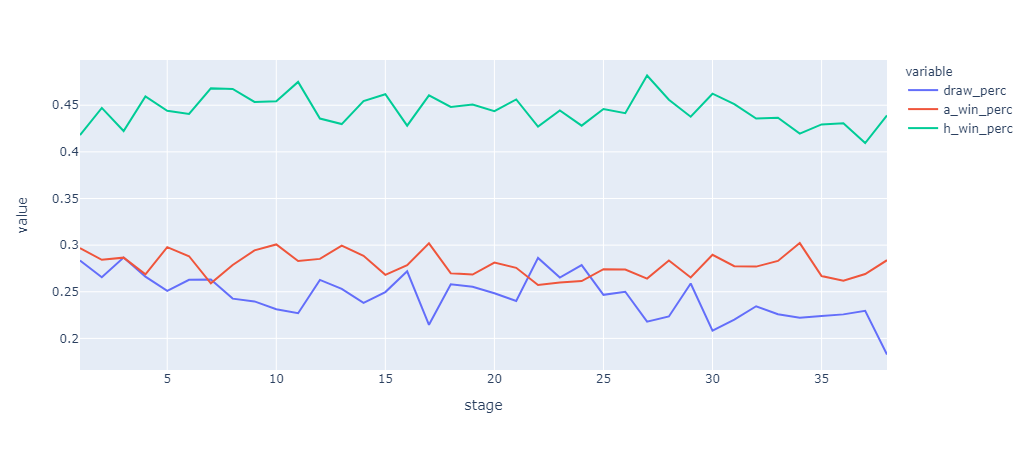

In [9]:
import plotly.express as px

df = new_match[['stage', 'h_win', 'a_win', 'draw']].groupby('stage', as_index=False).sum()
df['draw_perc'] = df['draw']/df.sum(axis=1)
df['a_win_perc'] = df['a_win']/df.sum(axis=1)
df['h_win_perc'] = df['h_win']/df.sum(axis=1)
fig = px.line(df, x='stage', y=df.columns[4:7])
# Show plot 
fig.show()

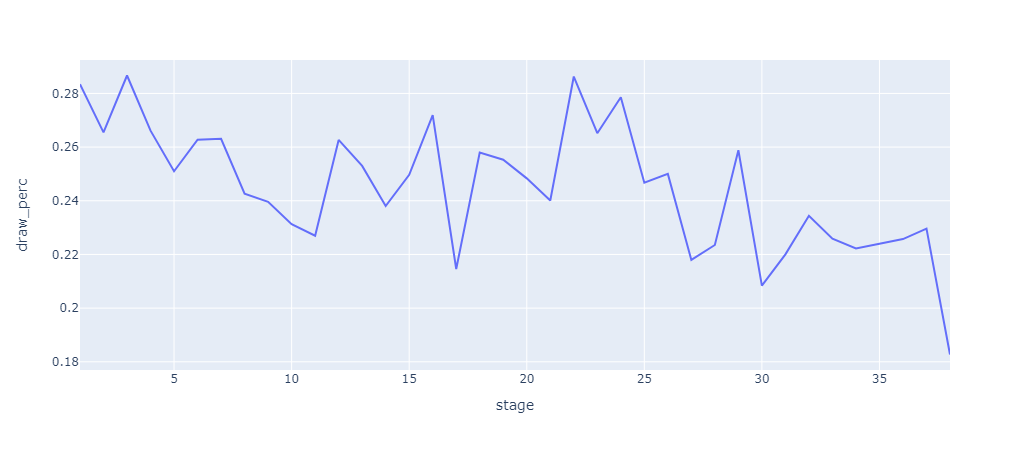

In [10]:
fig = px.line(df, x='stage', y='draw_perc')
# Show plot 
fig.show()

### Further verification of home team advantage by T-Test

To verify our visual observation of a home team advantage, we can use the T-statistic test.We run a two-sided test for the null hypothesis that 2 **related** percentages, (home vs away) have identical average values which should be expected if there is no home advantage.

Tests are run on both season percentages as well as across the very stages.

The results show that there is a very small probability that the average values are identical. 

In [67]:
from scipy import stats

df = new_match[['stage', 'h_win', 'a_win', 'draw']].groupby('stage', as_index=False).sum()
df['draw_perc'] = df['draw']/df.sum(axis=1)
df['a_win_perc'] = df['a_win']/df.sum(axis=1)
df['h_win_perc'] = df['h_win']/df.sum(axis=1)

print("T-statistic of mean of home percentage wins vs away grouped by stage", stats.ttest_rel(df['h_win_perc'],df['a_win_perc']))

df = new_match[['season', 'h_win', 'a_win', 'draw']].groupby('season', as_index=False).sum()
df['draw_perc'] = df['draw']/df.sum(axis=1)
df['a_win_perc'] = df['a_win']/df.sum(axis=1)
df['h_win_perc'] = df['h_win']/df.sum(axis=1)

print("T-statistic of mean of home percentage wins vs away grouped by season", stats.ttest_rel(df['h_win_perc'],df['a_win_perc']))

T-statistic of mean of home percentage wins vs away grouped by stage Ttest_relResult(statistic=47.28221403235412, pvalue=1.082217021352136e-34)
T-statistic of mean of home percentage wins vs away grouped by season Ttest_relResult(statistic=20.259357886306795, pvalue=1.788720371334954e-07)


# Question: What makes a good team?

We can also consider the question of what makes a good team by examining the question from another perspective; the comparing the attributes of top vs bottom teams. We define these as the top and bottom 20%.

Thereafter, we run statistical tests with the  null hypothesis that the top and bottom teams are not different from each other.

The following attributes have been identified as the differing factor between the top and bottom teams: buildUpPlayPassing, chanceCreationCrossing, chanceCreationShooting, defencePressure, buildUpPlayDribblingClass, buildUpPlayPassingClass, buildUpPlayPositioningClass,chanceCreationPassingClass, chanceCreationShootingClass, chanceCreationPositioningClass and defencePressureClass

We can also visualize the difference by plotting bar charts of top vs bottom team attributes. As we can see, even though average elo ratings of top teams are higher than bottom, the difference is not statistically significant enough by t-stat. 

In general, top teams are better at creating opportunities for themselves, putting pressure on the opposing defense, and pass the ball around more often during build up play. Furthermore, top teams are more aggressive as can be seen from their play style classification. For example, they are more likely to create chances using risky passes.

In [107]:
team_wins = dict(zip(new_match['home_team_id'].unique(), [0]*299)) # 299 teams
df = new_match
for i in range(df.shape[0]):
    if df.iloc[i]['h_win'] == 1:
        team_wins[df.iloc[i]['home_team_id']] += 1
    elif df.iloc[i]['a_win'] == 1:
        team_wins[df.iloc[i]['away_team_id']] += 1
    else:
        continue

In [114]:
df = pd.DataFrame(team_wins.items(), columns = ['team_id', 'wins'])
df = df.sort_values(by=['wins'])
print("bottom: ", list(df[0:60]['team_id'].values))
print("top: ", list(df[239:299]['team_id'].values))

bottom:  [7869, 108893, 9912, 8357, 6631, 6351, 8457, 6547, 4064, 7992, 9776, 8690, 9878, 6269, 9798, 9765, 9746, 4170, 8550, 8549, 8460, 4049, 8194, 8344, 6367, 6601, 9858, 188163, 177361, 6391, 9868, 8398, 8295, 8152, 9891, 8479, 10213, 9867, 9836, 10278, 8262, 208931, 7896, 7947, 8234, 8483, 8388, 10242, 8678, 9996, 9999, 8306, 9817, 9911, 8121, 8537, 274581, 8614, 9855, 8242]
top:  [8548, 9788, 9991, 8674, 10249, 9851, 10205, 9938, 9956, 8600, 8721, 8485, 10243, 8668, 9853, 9927, 8315, 8342, 2182, 9827, 10264, 10189, 8543, 8535, 8635, 8178, 8673, 10235, 8302, 10229, 10192, 10267, 8592, 8611, 9768, 8639, 8650, 8586, 9748, 9875, 8564, 8636, 9789, 8686, 9906, 9825, 9847, 8456, 8455, 8640, 9931, 8593, 9773, 9772, 9885, 10260, 9823, 9925, 8633, 8634]


In [62]:
bottom= [7869, 108893, 9912, 8357, 6631, 6351, 8457, 6547, 4064, 7992, 9776, 8690, 9878, 6269, 9798, 9765, 9746, 4170, 8550, 8549, 8460, 4049, 8194, 8344, 6367, 6601, 9858, 188163, 177361, 6391, 9868, 8398, 8295, 8152, 9891, 8479, 10213, 9867, 9836, 10278, 8262, 208931, 7896, 7947, 8234, 8483, 8388, 10242, 8678, 9996, 9999, 8306, 9817, 9911, 8121, 8537, 274581, 8614, 9855, 8242]
top = [8548, 9788, 9991, 8674, 10249, 9851, 10205, 9938, 9956, 8600, 8721, 8485, 10243, 8668, 9853, 9927, 8315, 8342, 2182, 9827, 10264, 10189, 8543, 8535, 8635, 8178, 8673, 10235, 8302, 10229, 10192, 10267, 8592, 8611, 9768, 8639, 8650, 8586, 9748, 9875, 8564, 8636, 9789, 8686, 9906, 9825, 9847, 8456, 8455, 8640, 9931, 8593, 9773, 9772, 9885, 10260, 9823, 9925, 8633, 8634]
team_attributes = pd.read_csv('cleaned_team_attributes.csv')
teams = team_attributes.groupby('team_id', as_index=False).mean()
teams.head()

team_id  buildUpPlaySpeed  buildUpPlayDribbling  buildUpPlayPassing  \
0     1601         47.333333                  48.0           46.166667   
1     1773         52.000000                  51.0           50.000000   
2     1957         47.166667                  54.0           52.666667   
3     2033         49.000000                  62.0           48.400000   
4     2182         60.333333                  52.5           49.000000   

   chanceCreationPassing  chanceCreationCrossing  chanceCreationShooting  \
0              55.500000               60.333333                    53.5   
1              50.000000               53.000000                    54.0   
2              50.833333               36.333333                    67.0   
3              51.800000               44.200000                    48.2   
4              56.666667               57.333333                    68.0   

   defencePressure  defenceAggression  defenceTeamWidth  ...  \
0        47.166667          47.333333         49.333333  ...   
1        43.000000          44.000000         50.000000  ...   
2        49.333333          56.333333         53.666667  ...   
3        42.200000          33.800000         45.400000  ...   
4        51.666667          48.500000         54.500000  ...   

   defencePressureClass_Medium  defenceAggressionClass_Contain  \
0                     1.000000                             0.0   
1                     1.000000                             0.0   
2                     0.666667                             0.0   
3                     1.000000                             0.6   
4                     1.000000                             0.0   

   defenceAggressionClass_Double  defenceAggressionClass_Press  \
0                       0.000000                      1.000000   
1                       0.000000                      1.000000   
2                       0.166667                      0.833333   
3                       0.000000                      0.400000   
4                       0.000000                      1.000000   

   defenceTeamWidthClass_Narrow  defenceTeamWidthClass_Normal  \
0                           0.0                      1.000000   
1                           0.0                      1.000000   
2                           0.0                      0.833333   
3                           0.0                      1.000000   
4                           0.0                      1.000000   

   defenceTeamWidthClass_Wide  defenceDefenderLineClass_Cover  \
0                    0.000000                             1.0   
1                    0.000000                             1.0   
2                    0.166667                             1.0   
3                    0.000000                             1.0   
4                    0.000000                             1.0   

   defenceDefenderLineClass_Offside Trap          elo  
0                                    0.0  1352.527466  
1                                    0.0          NaN  
2                                    0.0  1345.136170  
3                                    0.0  1497.432170  
4                                    0.0  1481.156464  

[5 rows x 44 columns]

In [63]:
attr_to_scale = ['buildUpPlaySpeed', 'buildUpPlayDribbling','buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing','chanceCreationShooting', 'defencePressure', 'defenceAggression','defenceTeamWidth', 'elo']
teams[attr_to_scale] = scaler.fit_transform(teams[attr_to_scale])

bottom_teams = teams[teams['team_id'].isin(bottom)]
top_teams = teams[teams['team_id'].isin(top)]

top_teams.drop(columns = ['team_id'], inplace = True)
bottom_teams.drop(columns = ['team_id'], inplace = True)

C:\Users\ChangChuanHong\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
from scipy import stats

for i in top_teams.columns:
    p_val = stats.ttest_ind(top_teams[i], bottom_teams[i])[1]
    if p_val < 0.05:
        print("The difference in {} is stat significant with tstat {} and p value of {}".format(i, stats.ttest_ind(top_teams[i], bottom_teams[i])[0], p_val))

The difference in buildUpPlayPassing is stat significant with tstat -3.8666261338318937 and p value of 0.00018975818315904383
The difference in chanceCreationCrossing is stat significant with tstat 2.7876521377881454 and p value of 0.006283994806666025
The difference in chanceCreationShooting is stat significant with tstat 2.093007429544112 and p value of 0.0387126665110825
The difference in defencePressure is stat significant with tstat 3.2436903585605217 and p value of 0.001574440443661823
The difference in buildUpPlayDribblingClass_Lots is stat significant with tstat 2.1534593828252984 and p value of 0.03352789361284168
The difference in buildUpPlayPassingClass_Long is stat significant with tstat -1.996564366793969 and p value of 0.04841218585845413
The difference in buildUpPlayPassingClass_Short is stat significant with tstat 2.1374337465314395 and p value of 0.034840081519938275
The difference in buildUpPlayPositioningClass_Free Form is stat significant with tstat 4.81616876501079

In [76]:
import plotly.express as px
import plotly.graph_objs as go
import plotly
bars = []
bars.append(go.Bar(
                y=top_teams.mean(),
                x = top_teams.columns,
                name='top_teams'))
bars.append(go.Bar(
                y=bottom_teams.mean(),
                x = bottom_teams.columns,
                name='bottom_teams'))

layout = go.Layout(title = 'Comparing top and bottom teams')
fig = go.Figure(data=bars, layout=layout)
plotly.offline.plot(fig)

'temp-plot.html'